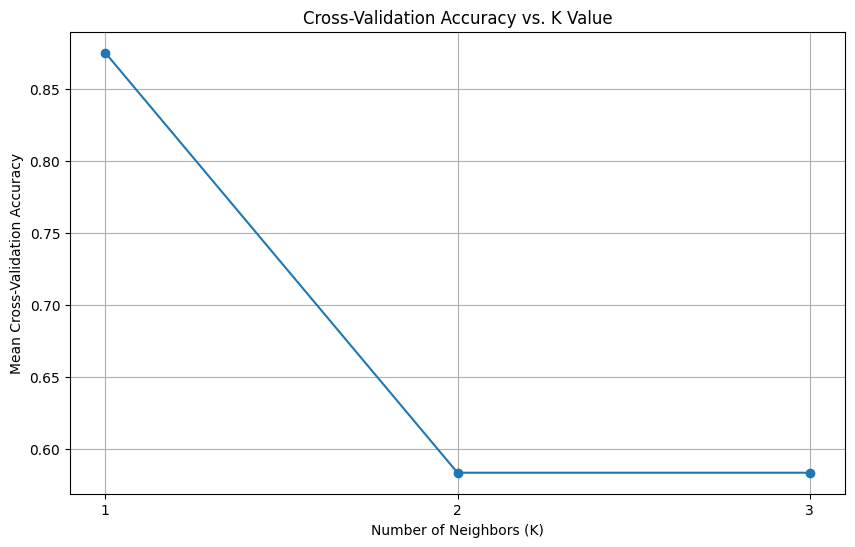


K-Nearest Neighbors Classifier with K = 5
Accuracy Score on Test Data: 1.0

Confusion Matrix on Test Data:
 [[1 0]
 [0 1]]

Classification Report on Test Data:
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00         1
 underweight       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



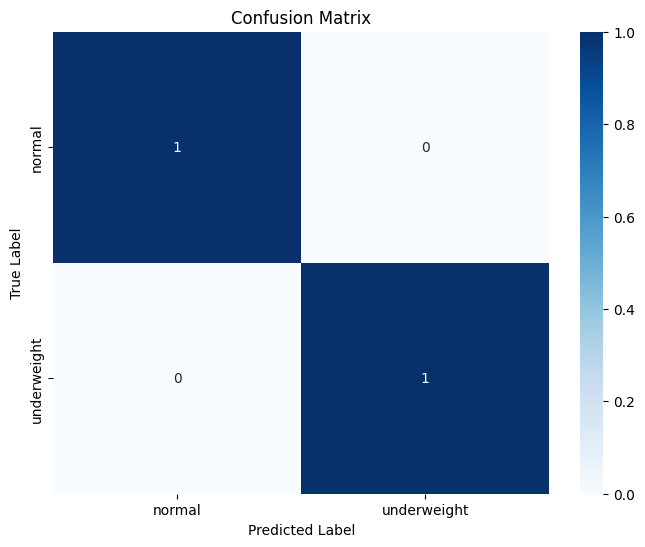

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: 'dataset.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df[['height','weight']]
y = df['class']
# X=df.iloc[:,:-1]
# y=df.iloc[:,:-1]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose an appropriate k value using cross-validation
k_values = list(range(1, 4))  # Try k values from 1 to 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to help choose k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Based on the plot, choose the best k value
# Let's assume the plot suggests k=5 is a good choice (this might vary)
best_k = 5

# Build and train the KNN classifier with the chosen k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"\nK-Nearest Neighbors Classifier with K = {best_k}")
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

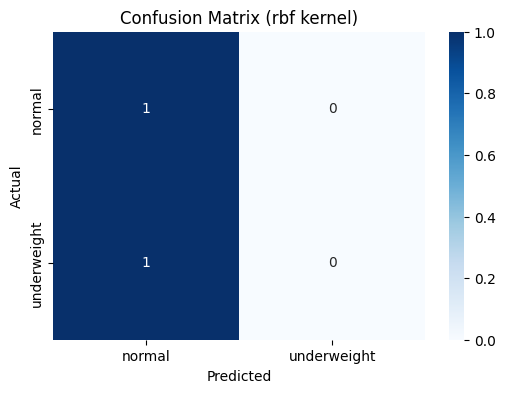

Accuracy with rbf kernel: 0.5000




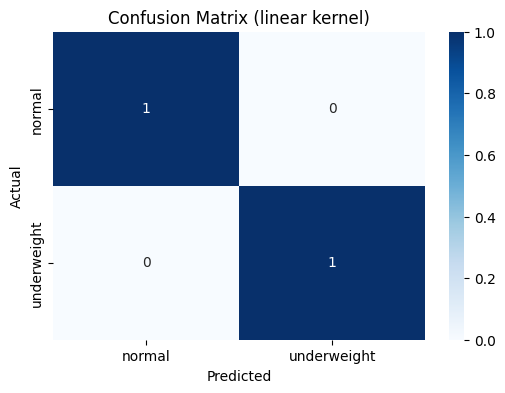

Accuracy with linear kernel: 1.0000




In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris_df = pd.read_csv('dataset.csv')

# Separate features and target
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate SVM with different kernels
def evaluate_svm(kernel_type):
    # Create SVM classifier
    svm_clf = SVC(kernel=kernel_type, random_state=42)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=svm_clf.classes_,
                yticklabels=svm_clf.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Accuracy with {kernel_type} kernel: {accuracy:.4f}")
    print("\n")

# Evaluate with RBF kernel (default)
evaluate_svm('rbf')

# Evaluate with linear kernel
evaluate_svm('linear')


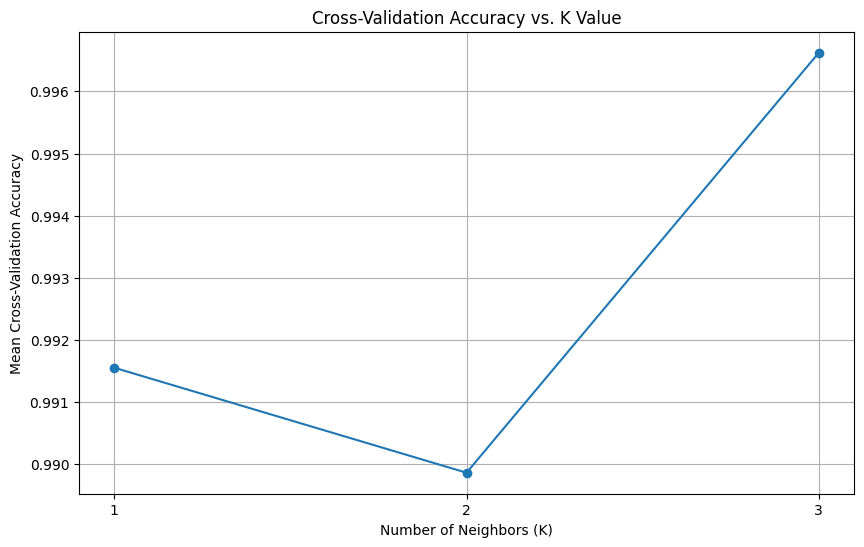


K-Nearest Neighbors Classifier with K = 5
Accuracy Score on Test Data: 0.9865771812080537

Confusion Matrix on Test Data:
 [[127   2]
 [  0  20]]

Classification Report on Test Data:
               precision    recall  f1-score   support

      normal       1.00      0.98      0.99       129
 underweight       0.91      1.00      0.95        20

    accuracy                           0.99       149
   macro avg       0.95      0.99      0.97       149
weighted avg       0.99      0.99      0.99       149



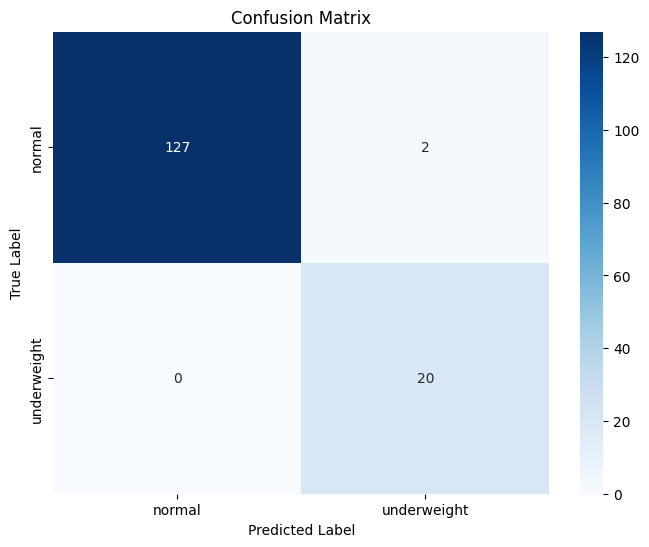

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

try:
    df = pd.read_csv("bmi.csv")
except FileNotFoundError:
    print("Error: 'bmi.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df[['height','weight']]
y = df['class']
# X=df.iloc[:,:-1]
# y=df.iloc[:,:-1]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose an appropriate k value using cross-validation
k_values = list(range(1, 4))  # Try k values from 1 to 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to help choose k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Based on the plot, choose the best k value
# Let's assume the plot suggests k=5 is a good choice (this might vary)
best_k = 5

# Build and train the KNN classifier with the chosen k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"\nK-Nearest Neighbors Classifier with K = {best_k}")
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

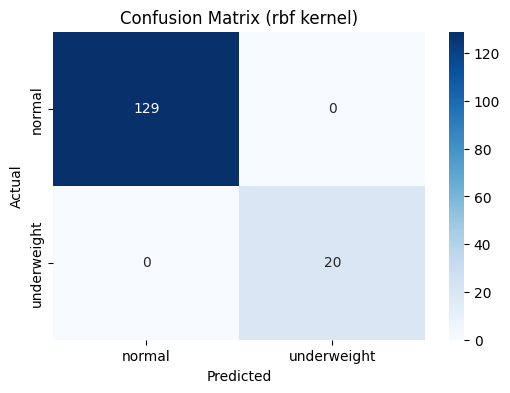

Accuracy with rbf kernel: 1.0000




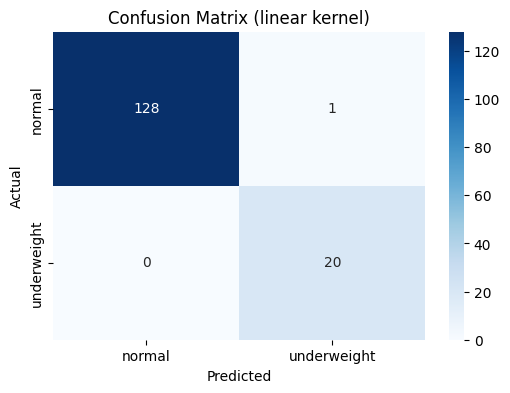

Accuracy with linear kernel: 0.9933




In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris_df = pd.read_csv('bmi.csv')

# Separate features and target
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate SVM with different kernels
def evaluate_svm(kernel_type):
    # Create SVM classifier
    svm_clf = SVC(kernel=kernel_type, random_state=42)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=svm_clf.classes_,
                yticklabels=svm_clf.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Accuracy with {kernel_type} kernel: {accuracy:.4f}")
    print("\n")

# Evaluate with RBF kernel (default)
evaluate_svm('rbf')

# Evaluate with linear kernel
evaluate_svm('linear')
